## How to Approach Machine Learning Projects

![](https://i.imgur.com/kKdAALX.png)


In this section, we'll explore a step-by-step process for approaching ML problems:

1. Understand the business requirements and the nature of the available data.
2. Classify the problem as supervised/unsupervised and regression/classification.
3. Download, clean & explore the data and create new features that may improve models.
4. Create training/test/validation sets and prepare the data for training ML models.
5. Create a quick & easy baseline model to evaluate and benchmark future models.
6. Pick a modeling strategy, train a model, and tune hyperparameters to achieve optimal fit.
7. Experiment and combine results from multiple strategies to get a better result.
8. Interpret models, study individual predictions, and present your findings. 


Let's install and import the required libraries.

In [1]:
#restart the kernel after installation
!pip install numpy pandas-profiling matplotlib plotly seaborn --quiet


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install opendatasets --upgrade --quiet


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import os
import jovian
import matplotlib
import opendatasets as od
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

<IPython.core.display.Javascript object>

## Step 1 - Understand Business Requirements & Nature of Data

<img src="https://i.imgur.com/63XEArk.png" width="640">


Most machine learning models are trained to serve a real-world use case. It's important to understand the business requirements, modeling objectives and the nature of the data available before you start building a machine learning model.

### Understanding the Big Picture

The first step in any machine learning problem is to read the given documentation, talk to various stakeholders and identify the following:

1. What is the business problem you're trying to solve using machine learning?
2. Why are we interested in solving this problem? What impact will it have on the business?
3. How is this problem solved currently, without any machine learning tools?
4. Who will use the results of this model, and how does it fit into other business processes?
5. How much historical data do we have, and how was it collected?
6. What features does the historical data contain? Does it contain the historical values for what we're trying to predict.
7. What are some known issues with the data (data entry errors, missing data, differences in units etc.)
8. Can we look at some sample rows from the dataset? How representative are they of the entire dataset.
9. Where is the data stored and how will you get access to it?


Gather as much information about the problem as possible, so that you're clear understanding of the objective and feasibility of the project.

### Working with Real World Data

Whenever possible, try to work with real world datasets. [Kaggle](https://kaggle.com/datasets) is a great source for real-world data.

> Below, I have answered the above questions using the dataset of [Rossmann Store Sales Prediction](https://www.kaggle.com/c/rossmann-store-sales):
>
>

### Questions and Answers

1. **What is the business problem you're trying to solve using machine learning?**
   - The business problem is to predict daily sales for Rossmann stores across Germany for a period of six weeks. This prediction will help store managers make informed decisions regarding staffing and inventory management based on forecasted sales levels.

2. **Why are we interested in solving this problem? What impact will it have on the business?**
   - Accurate sales forecasting will allow Rossmann to optimize staff scheduling, improve productivity, and maintain customer satisfaction. By predicting sales more reliably, Rossmann can ensure that each store has adequate resources, particularly during high-demand periods or promotions. This will lead to increased operational efficiency and potentially higher revenue due to better alignment with customer demand.

3. **How is this problem solved currently, without any machine learning tools?**
   - Currently, individual store managers manually predict sales for their stores, relying on their experience and local knowledge. These predictions are based on various factors such as promotions, local events, holidays, and historical trends. However, this approach can lead to inconsistent accuracy across stores due to the subjective nature of individual predictions.

4. **Who will use the results of this model, and how does it fit into other business processes?**
   - The results of this model will primarily be used by store managers to make data-driven decisions about staff scheduling and resource allocation. Additionally, Rossmann’s central management team may use the forecasts to better understand sales trends across locations, allowing them to plan promotions, stock, and resource allocation more effectively. This model integrates with the staffing and inventory management processes, helping align store operations with forecasted demand.

5. **How much historical data do we have, and how was it collected?**
   - The dataset includes historical sales data for 1,115 Rossmann stores. This data covers various features such as daily sales, customer numbers, promotions, and store-specific factors (e.g., type, competition, holidays). The data appears to have been collected at the store level, likely from Rossmann’s point-of-sale and store management systems over an extended period to capture diverse patterns and trends.

6. **What features does the historical data contain? Does it contain the historical values for what we're trying to predict?**
   - The dataset contains various features, including:
     - **Sales** (the target variable to predict)
     - **Customers** (daily customer count)
     - **Open** (whether the store was open)
     - **StateHoliday** and **SchoolHoliday** (holiday indicators)
     - **StoreType** and **Assortment** (store characteristics)
     - **CompetitionDistance** and **CompetitionOpenSince** (competition details)
     - **Promo** and **Promo2** with associated start dates and intervals.
   - These features include historical sales values, which serve as the basis for training the model to predict future sales.

7. **What are some known issues with the data (data entry errors, missing data, differences in units, etc.)?**
   - Some known issues that might be present include:
     - **Missing data**: Certain fields, like competition opening dates or promo intervals, may be missing for some stores.
     - **Data entry inconsistencies**: Fields like **StateHoliday** and **StoreType** use codes (e.g., "a," "b," "c"), which need to be carefully handled to avoid errors.
     - **Differences in units**: Features such as **CompetitionDistance** may need unit verification to ensure consistency, especially if data has been combined from multiple sources.
     - **Closed stores**: Some days may have sales marked as zero because the store was closed, which could affect training if not properly handled.

8. **Can we look at some sample rows from the dataset? How representative are they of the entire dataset?**
   - Sample rows should include a variety of stores, dates, and feature values, including different states of **Open**, **Promo**, **SchoolHoliday**, and **StateHoliday**. This would help ensure that the dataset is representative of the full range of conditions under which Rossmann stores operate, including both busy periods (promotions, holidays) and regular days. Examining a subset will provide insights into feature distribution and potential anomalies.

9. **Where is the data stored and how will you get access to it?**
   - The data for this project is provided in CSV files, including **train.csv** (historical data with sales), **test.csv** (historical data excluding sales), **sample_submission.csv**, and **store.csv** (supplemental store information). Access to this data would typically be provided by Rossmann or a data hosting service (e.g., Kaggle) where the files can be downloaded.


## Step 2 - Classify the problem as supervised/unsupervised & regression/classification

<img src="https://i.imgur.com/rqt2A7F.png" width="640">

Here's the landscape of machine learning([source](https://medium.datadriveninvestor.com/machine-learning-in-10-minutes-354d83e5922e)):

<img src="https://miro.medium.com/max/842/1*tlQwBmbL6RkuuFq8OPJofw.png" width="640">



Here are the topics in machine learning that we're studying in this section ([source](https://vas3k.com/blog/machine_learning/)): 

<img src="https://i.imgur.com/VbVFAsg.png" width="640">




> What type of problem is store sales prediction: https://www.kaggle.com/c/rossmann-store-sales ?

**Explanation**: Store sales prediction is a regression problem because it involves predicting a continuous numerical value (sales amount) based on various factors such as promotions, holidays, and customer traffic.

> What type of problem is breast cancer identification: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data ?

**Explanation**: Breast cancer identification is a classification problem as it involves categorizing data into distinct classes, such as "malignant" or "benign," based on features like tumor size, texture, and shape.

> What type of problem is mall customer segmentation: https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python

**Explanation**: Mall customer segmentation is a clustering problem because it groups customers into segments based on similarity in characteristics, such as shopping behavior and spending patterns, without predefined categories.

### Loss Functions and Evaluation Metrics

Once you have identified the type of problem you're solving, you need to pick an appropriate evaluation metric. Also, depending on the kind of model you train, your model will also use a loss/cost function to optimize during the training process.

* **Evaluation metrics** - they're used by humans to evaluate the ML model

* **Loss functions** - they're used by computers to optimize the ML model

They are often the same (e.g. RMSE for regression problems), but they can be different (e.g. Cross entropy and Accuracy for classification problems).

See this article for a survey of common loss functions and evaluation metrics: https://towardsdatascience.com/11-evaluation-metrics-data-scientists-should-be-familiar-with-lessons-from-a-high-rank-kagglers-8596f75e58a7

> What are the appropriate loss function and evaluation metric for store sales prediction: https://www.kaggle.com/c/rossmann-store-sales ?

**Store Sales Prediction**
   - **Appropriate Loss Function**: **Mean Squared Error (MSE)** or **Mean Absolute Error (MAE)**
     - **Explanation**: For regression problems like store sales prediction, MSE or MAE are commonly used loss functions. MSE penalizes larger errors more heavily, while MAE provides a straightforward average of absolute errors.
   - **Appropriate Evaluation Metric**: **Root Mean Squared Error (RMSE)** or **Mean Absolute Percentage Error (MAPE)**
     - **Explanation**: RMSE provides an interpretable metric for overall prediction error by taking the square root of MSE. MAPE is useful when we want to understand the prediction error as a percentage of the actual values, which is helpful in forecasting contexts.

> What are the appropriate loss function and evaluation metric for breast cancer identification: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data ?

**Breast Cancer Identification**
   - **Appropriate Loss Function**: **Binary Cross-Entropy**
     - **Explanation**: Since breast cancer identification is a binary classification problem, binary cross-entropy (or log loss) is a suitable loss function. It measures the difference between the predicted probabilities and the actual class labels.
   - **Appropriate Evaluation Metric**: **Accuracy**, **Precision**, **Recall**, and **F1 Score**
     - **Explanation**: Accuracy provides an overall measure of correctly classified instances, but for medical diagnosis tasks, precision (to reduce false positives) and recall (to reduce false negatives) are especially important. The F1 Score balances precision and recall, which is useful when both false positives and false negatives have significant consequences.

## Step 3 - Download, clean & explore the data and create new features

<img src="https://i.imgur.com/0f7foe7.png" width="640">

### Downloading Data

There may be different sources to get the data:

* CSV files
* SQL databases
* Raw File URLs
* Kaggle datasets 
* Google Drive
* Dropbox
* etc.

Identify the right tool/library to get the data. 

For the Rossmann Store Sales prediction dataset, we'll use the `opendatasets` library. Make sure to [accept the competition rules](https://www.kaggle.com/c/rossmann-store-sales/rules) before executing the following cell.


In [6]:
od.download('https://www.kaggle.com/c/rossmann-store-sales')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle Key:Downloading rossmann-store-sales.zip to .\rossmann-store-sales


100%|██████████| 6.99M/6.99M [00:00<00:00, 26.9MB/s]



Extracting archive .\rossmann-store-sales/rossmann-store-sales.zip to .\rossmann-store-sales


In [7]:
os.listdir('rossmann-store-sales')

['sample_submission.csv', 'store.csv', 'test.csv', 'train.csv']

In [8]:
ross_df = pd.read_csv('./rossmann-store-sales/train.csv', low_memory=False)

In [9]:
ross_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [10]:
store_df = pd.read_csv('./rossmann-store-sales/store.csv')

In [11]:
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


We can merge the two data frames to get a richer set of features for each row of the training set. 

In [12]:
merged_df = ross_df.merge(store_df, how='left', on='Store')
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [13]:
merged_df.shape

(1017209, 18)

The dataset also contains a test set.

In [14]:
test_df = pd.read_csv('rossmann-store-sales/test.csv')

In [15]:
merged_test_df = test_df.merge(store_df, how='left', on='Store') 

In [83]:
merged_test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
41084,41085,1112,6,2015-08-01,1.0,0,0,0,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
41085,41086,1113,6,2015-08-01,1.0,0,0,0,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
41086,41087,1114,6,2015-08-01,1.0,0,0,0,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


### Cleaning Data

The first step is to check the column data types and identify if there are any null values.

In [16]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

It appears that there are no null values.

In [17]:
round(merged_df.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
Store,1017209.0,558.43,321.91,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,1017209.0,4.00,2.00,1.0,2.0,4.0,6.0,7.0
Sales,1017209.0,5773.82,3849.93,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,633.15,464.41,0.0,405.0,609.0,837.0,7388.0
Open,1017209.0,0.83,0.38,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,0.38,0.49,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,1017209.0,0.18,0.38,0.0,0.0,0.0,0.0,1.0
CompetitionDistance,1014567.0,5430.09,7715.32,20.0,710.0,2330.0,6890.0,75860.0
CompetitionOpenSinceMonth,693861.0,7.22,3.21,1.0,4.0,8.0,10.0,12.0
CompetitionOpenSinceYear,693861.0,2008.69,5.99,1900.0,2006.0,2010.0,2013.0,2015.0


In [18]:
merged_df.duplicated().sum()

0

Let's also parse the date column

In [19]:
merged_df['Date'] = pd.to_datetime(merged_df.Date)

In [20]:
merged_test_df['Date'] = pd.to_datetime(merged_test_df.Date)

In [21]:
merged_df.Date.min(), merged_df.Date.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2015-07-31 00:00:00'))

In [22]:
merged_test_df.Date.min(), merged_test_df.Date.max()

(Timestamp('2015-08-01 00:00:00'), Timestamp('2015-09-17 00:00:00'))

### Exploratory Data Analysis and Visualization

Objectives of exploratory data analysis:

- Study the distributions of individual columns (uniform, normal, exponential)
- Detect anomalies or errors in the data (e.g. missing/incorrect values)
- Study the relationship of target column with other columns (linear, non-linear etc.)
- Gather insights about the problem and the dataset
- Come up with ideas for preprocessing and feature engineering




Let's study the distribution of the target "Sales" column

<Axes: xlabel='Sales', ylabel='Count'>

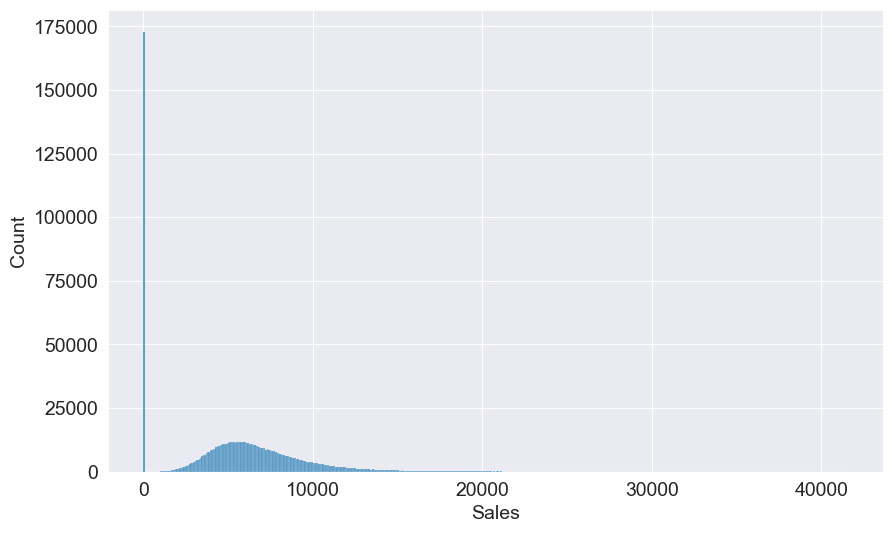

In [23]:
sns.histplot(data=merged_df, x='Sales')

Explain why the sales are 0 on so many dates? 



The histogram shows a large spike at zero sales, which is likely due to days when the stores were closed. There are several reasons why this might happen:

1. **Closed Days (Holidays/Weekends)**: Many retail stores are closed on specific holidays or weekends, depending on local policies. For these days, the sales are recorded as zero, creating a large spike in the distribution.

2. **Temporary Closures**: Some stores may close temporarily for reasons such as renovations, staff shortages, or other operational needs. This also contributes to the number of days with zero sales.

3. **Sales Pattern Variability**: The histogram shows a sharp concentration at zero, followed by a spread of values. This pattern suggests that while most days have some level of sales, there are many instances where no sales occur, likely due to store closures rather than typical fluctuations in customer demand.


In [24]:
merged_df.Open.value_counts()

Open
1    844392
0    172817
Name: count, dtype: int64

In [25]:
merged_df.Sales.value_counts()[0]

172871

To make our modeling simple, let's simply exclude the dates when the store was closed (we can handle it as a special case while making predictions. 

In [26]:
merged_df = merged_df[merged_df.Open==1].copy()

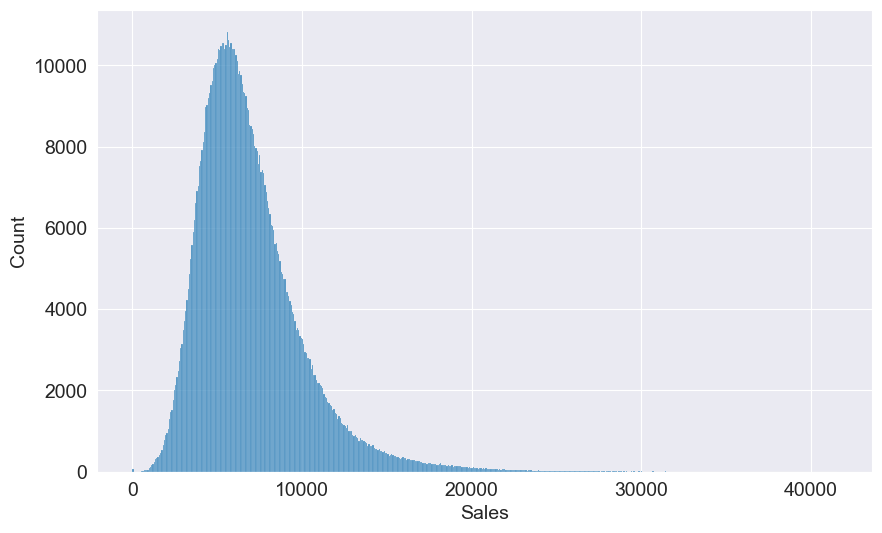

In [27]:
sns.histplot(data=merged_df, x='Sales');

Let's explore some other columns

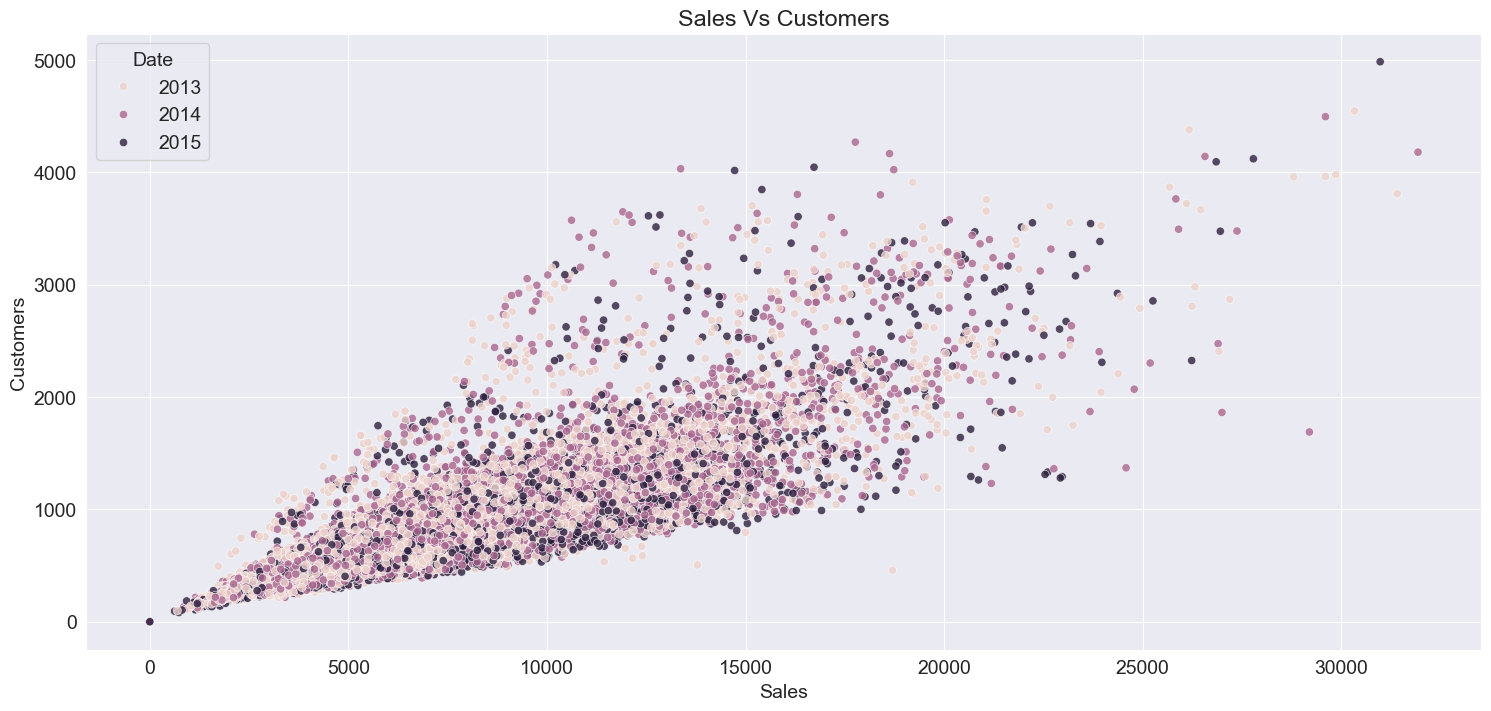

In [28]:
plt.figure(figsize=(18,8))
temp_df = merged_df.sample(40000)
sns.scatterplot(x=temp_df.Sales, y=temp_df.Customers, hue=temp_df.Date.dt.year, alpha=0.8)
plt.title("Sales Vs Customers")
plt.show()

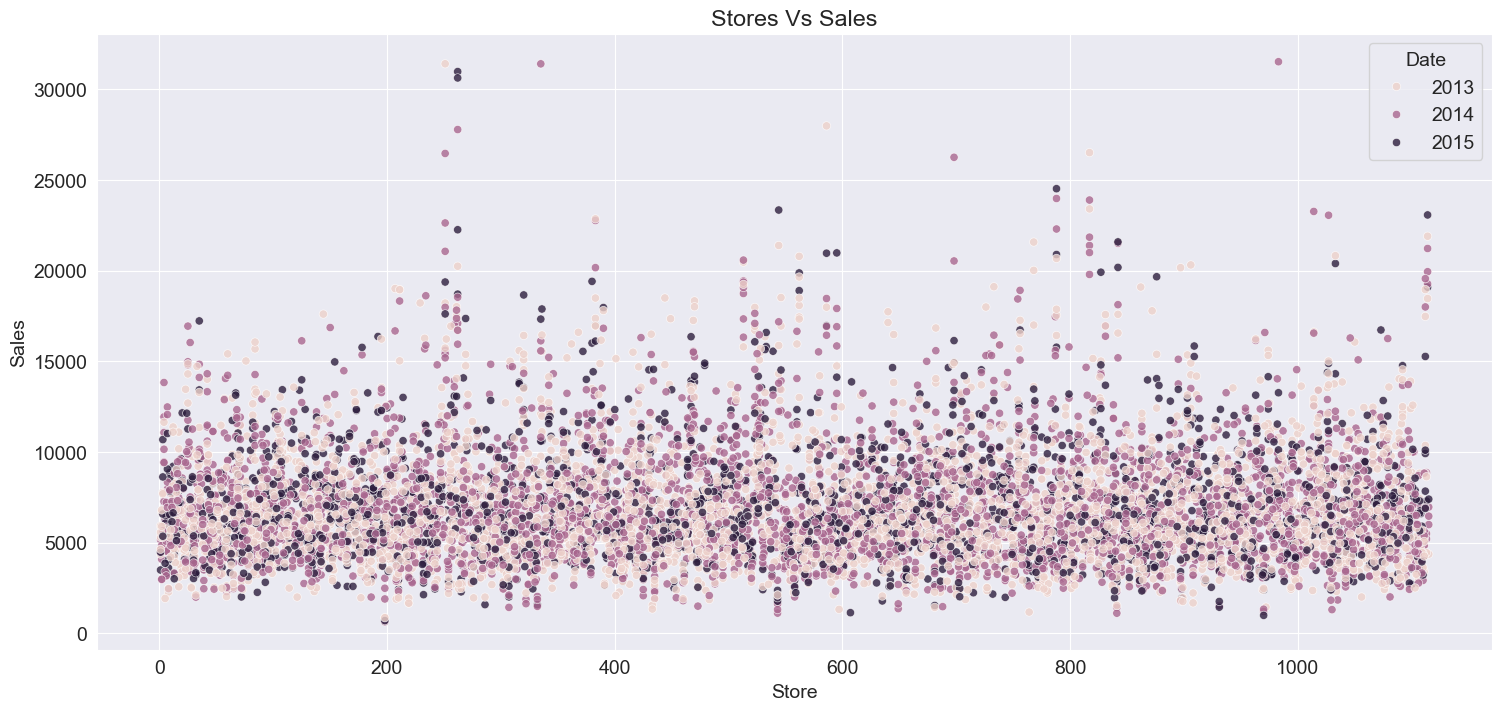

In [29]:
plt.figure(figsize=(18,8))
temp_df = merged_df.sample(10000)
sns.scatterplot(x=temp_df.Store, y=temp_df.Sales, hue=temp_df.Date.dt.year, alpha=0.8)
plt.title("Stores Vs Sales")
plt.show()

<Axes: xlabel='DayOfWeek', ylabel='Sales'>

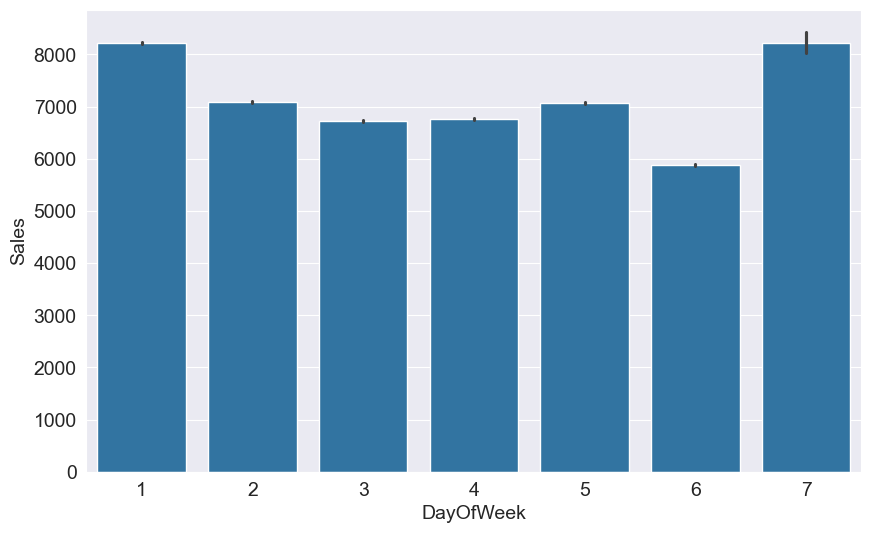

In [30]:
sns.barplot(data=merged_df, x='DayOfWeek', y='Sales')

<Axes: xlabel='Promo', ylabel='Sales'>

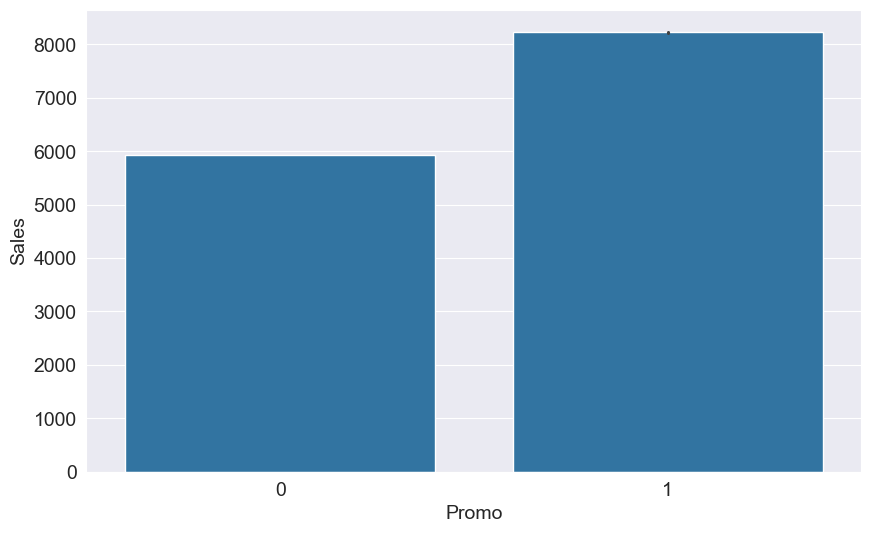

In [31]:
sns.barplot(data=merged_df, x='Promo', y='Sales')

### Feature Engineering

Feature engineer is the process of creating new features (columns) by transforming/combining existing features or by incorporating data from external sources. 


For example, here are some features that can be extracted from the "Date" column:

1. Day of week
2. Day or month
3. Month
4. Year
5. Weekend/Weekday
6. Month/Quarter End



In [34]:
merged_df['Day'] = merged_df.Date.dt.day
merged_df['Month'] = merged_df.Date.dt.month
merged_df['Year'] = merged_df.Date.dt.year

In [35]:
merged_test_df['Day'] = merged_test_df.Date.dt.day
merged_test_df['Month'] = merged_test_df.Date.dt.month
merged_test_df['Year'] = merged_test_df.Date.dt.year

<Axes: xlabel='Year', ylabel='Sales'>

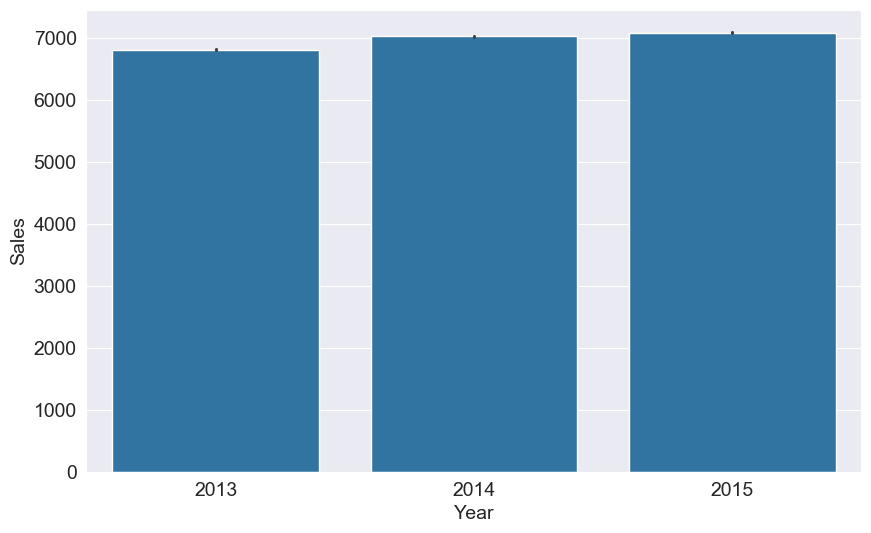

In [36]:
sns.barplot(data=merged_df, x='Year', y='Sales')

<Axes: xlabel='Month', ylabel='Sales'>

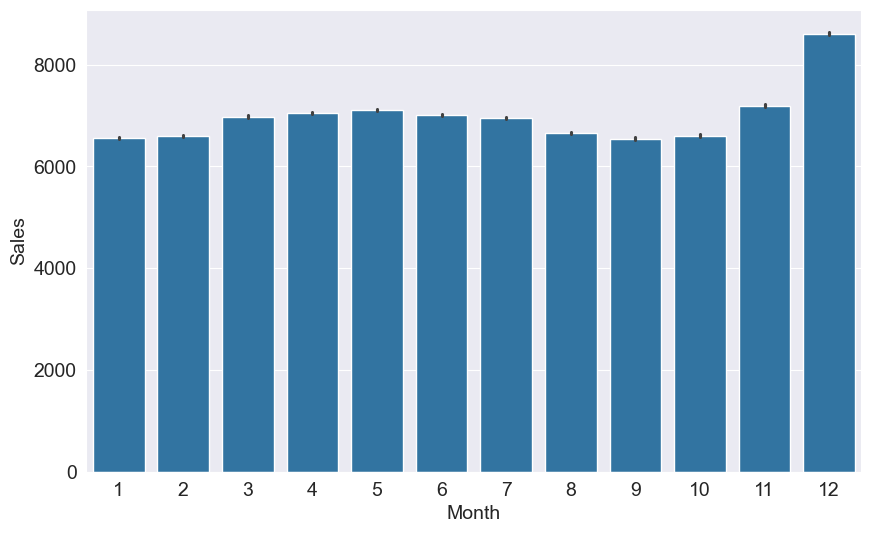

In [37]:
sns.barplot(data=merged_df, x='Month', y='Sales')

## Step 4 - Create a training/test/validation split and prepare the data for training

<img src="https://i.imgur.com/XZ9aP10.png" width="640">

### Train/Test/Validation Split

The data already contains a test set, which contains over one month of data after the end of the training set. We can apply a similar strategy to create a validation set. We'll the last 25% of rows for the validation set, after ordering by date

In [38]:
len(merged_df)

844392

In [39]:
train_size = int(.75 * len(merged_df))
train_size

633294

In [40]:
sorted_df = merged_df.sort_values('Date')
train_df, val_df = sorted_df[:train_size], sorted_df[train_size:]

In [41]:
len(train_df), len(val_df)

(633294, 211098)

In [42]:
train_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,Month,Year
1017190,1097,2,2013-01-01,5961,1405,1,0,a,1,b,...,720.0,3.0,2002.0,0,NaN,NaN,NaN,1,1,2013
1016179,85,2,2013-01-01,4220,619,1,0,a,1,b,...,1870.0,10.0,2011.0,0,NaN,NaN,NaN,1,1,2013
1016353,259,2,2013-01-01,6851,1444,1,0,a,1,b,...,210.0,NaN,NaN,0,NaN,NaN,NaN,1,1,2013
1016356,262,2,2013-01-01,17267,2875,1,0,a,1,b,...,1180.0,5.0,2013.0,0,NaN,NaN,NaN,1,1,2013
1016368,274,2,2013-01-01,3102,729,1,0,a,1,b,...,3640.0,NaN,NaN,1,10.0,2013.0,"Jan,Apr,Jul,Oct",1,1,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256632,745,3,2014-12-10,6897,657,1,0,0,0,a,...,17650.0,11.0,2013.0,1,37.0,2009.0,"Jan,Apr,Jul,Oct",10,12,2014
256642,756,3,2014-12-10,15736,2292,1,0,0,0,a,...,50.0,NaN,NaN,1,40.0,2011.0,"Jan,Apr,Jul,Oct",10,12,2014
256634,747,3,2014-12-10,7444,608,1,0,0,0,c,...,45740.0,8.0,2008.0,0,NaN,NaN,NaN,10,12,2014
256633,746,3,2014-12-10,5207,474,1,0,0,0,d,...,4330.0,2.0,2011.0,1,35.0,2011.0,"Mar,Jun,Sept,Dec",10,12,2014


In [43]:
train_df.Date.min(), train_df.Date.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2014-12-10 00:00:00'))

In [44]:
val_df.Date.min(), val_df.Date.max()

(Timestamp('2014-12-10 00:00:00'), Timestamp('2015-07-31 00:00:00'))

In [45]:
merged_test_df.Date.min(), merged_test_df.Date.max()

(Timestamp('2015-08-01 00:00:00'), Timestamp('2015-09-17 00:00:00'))

In [46]:
train_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,Month,Year
1017190,1097,2,2013-01-01,5961,1405,1,0,a,1,b,...,720.0,3.0,2002.0,0,NaN,NaN,NaN,1,1,2013
1016179,85,2,2013-01-01,4220,619,1,0,a,1,b,...,1870.0,10.0,2011.0,0,NaN,NaN,NaN,1,1,2013
1016353,259,2,2013-01-01,6851,1444,1,0,a,1,b,...,210.0,NaN,NaN,0,NaN,NaN,NaN,1,1,2013
1016356,262,2,2013-01-01,17267,2875,1,0,a,1,b,...,1180.0,5.0,2013.0,0,NaN,NaN,NaN,1,1,2013
1016368,274,2,2013-01-01,3102,729,1,0,a,1,b,...,3640.0,NaN,NaN,1,10.0,2013.0,"Jan,Apr,Jul,Oct",1,1,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256632,745,3,2014-12-10,6897,657,1,0,0,0,a,...,17650.0,11.0,2013.0,1,37.0,2009.0,"Jan,Apr,Jul,Oct",10,12,2014
256642,756,3,2014-12-10,15736,2292,1,0,0,0,a,...,50.0,NaN,NaN,1,40.0,2011.0,"Jan,Apr,Jul,Oct",10,12,2014
256634,747,3,2014-12-10,7444,608,1,0,0,0,c,...,45740.0,8.0,2008.0,0,NaN,NaN,NaN,10,12,2014
256633,746,3,2014-12-10,5207,474,1,0,0,0,d,...,4330.0,2.0,2011.0,1,35.0,2011.0,"Mar,Jun,Sept,Dec",10,12,2014


In [47]:
train_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Day', 'Month', 'Year'],
      dtype='object')

### Input and Target columns

Let's also identify input and target columns. Note that we can't use the no. of customers as an input, because this information isn't available beforehand. Also, we needn't use all the available columns, we can start out with just a small subset.

In [48]:
input_cols = ['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'StoreType', 'Assortment', 'Day', 'Month', 'Year']

In [49]:
target_col = 'Sales'

Let's also separate out numeric and categorical columns.

In [50]:
merged_df[input_cols].nunique()

Store           1115
DayOfWeek          7
Promo              2
StateHoliday       4
StoreType          4
Assortment         3
Day               31
Month             12
Year               3
dtype: int64

In [51]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [52]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [53]:
test_inputs = merged_test_df[input_cols].copy()
# Test data does not have targets

Note that some columns can be treated as both numeric and categorical, and it's up to you to decide how you want to deal with them.

In [54]:
numeric_cols = ['Store', 'Day', 'Month', 'Year']
categorical_cols = ['DayOfWeek', 'Promo', 'StateHoliday', 'StoreType', 'Assortment']

### Imputation, Scaling and Encode

Let's impute missing data from numeric columns and scale the values to the $(0, 1)$ range. 

In [55]:
from sklearn.impute import SimpleImputer

In [56]:
imputer = SimpleImputer(strategy='mean').fit(train_inputs[numeric_cols])

In [57]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

Note that this step wasn't necessary for the store sales dataset, as there were no null values. Also, we can apply a different imputation strategy to different columns depending on their distributions (e.g. mean for normally distribute and median for exponentially distributed).

Let's also scale the values to the $(0, 1)$ range.

In [58]:
from sklearn.preprocessing import MinMaxScaler

In [59]:
scaler = MinMaxScaler().fit(train_inputs[numeric_cols])

In [60]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

Finally, let's encode categorical columns as one-hot vectors.

In [61]:
from sklearn.preprocessing import OneHotEncoder

In [63]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(train_inputs[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [64]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

Explore the `scikit-learn` preprocessing module: https://scikit-learn.org/stable/modules/preprocessing.html

Let's now extract out the numeric data.

In [65]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

## Step 5 - Create quick & easy baseline models to benchmark future models

<img src="https://i.imgur.com/1DLgiEz.png" width="640">

A quick baseline model helps establish the minimum score any ML model you train should achieve.


### Fixed/Random Guess

Let's define a model that always returns the mean value of Sales as the prediction.

In [66]:
def return_mean(inputs):
    return np.full(len(inputs), merged_df.Sales.mean())

In [67]:
train_preds = return_mean(X_train)

In [68]:
train_preds

array([6955.51429076, 6955.51429076, 6955.51429076, ..., 6955.51429076,
       6955.51429076, 6955.51429076])

Let's evaluate this to using the RMSE score.

In [69]:
from sklearn.metrics import mean_squared_error

In [70]:
mean_squared_error(train_preds, train_targets, squared=False)

c:\Users\praja\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


3082.450443277419

In [71]:
mean_squared_error(return_mean(X_val), val_targets, squared=False)

c:\Users\praja\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


3168.6033635047716

The model is off by about $3000 on average.

Let's try another model, which makes a random guess between the lowest and highest sale.

In [72]:
def guess_random(inputs):
    lo, hi = merged_df.Sales.min(), merged_df.Sales.max()
    return np.random.random(len(inputs)) * (hi - lo) + lo

In [73]:
train_preds = guess_random(X_train)
train_preds

array([35155.92523799, 32087.78453629, 17182.05517433, ...,
       23667.1174755 , 14110.95845209, 33243.40920759])

In [74]:
mean_squared_error(train_preds, train_targets, squared=False)

c:\Users\praja\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


18606.493367892257

In [75]:
mean_squared_error(guess_random(X_val), val_targets, squared=False)

c:\Users\praja\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


18372.894594939837

Clearly, this model is much worse.

### Baseline ML model

Let's train a simple `LinearRegression` model, with no customization.

In [78]:
from sklearn.linear_model import LinearRegression

In [79]:
linreg = LinearRegression()

In [80]:
linreg.fit(X_train, train_targets)

LinearRegression()

`model.fit` uses the following workflow for training the model ([source](https://www.deepnetts.com/blog/from-basic-machine-learning-to-deep-learning-in-5-minutes.html)):

1. We initialize a model with random parameters (weights & biases).
2. We pass some inputs into the model to obtain predictions.
3. We compare the model's predictions with the actual targets using the loss function.  
4. We use an optimization technique (like least squares, gradient descent etc.) to reduce the loss by adjusting the weights & biases of the model
5. We repeat steps 1 to 4 till the predictions from the model are good enough.


<img src="https://www.deepnetts.com/blog/wp-content/uploads/2019/02/SupervisedLearning.png" width="480">



The we have fit the model, the model can now be used to make predictions. Note that the parameters of the model will not be updated during prediction.

In [81]:
train_preds = linreg.predict(X_train)
train_preds

array([ 7130., 10603.,  7052., ...,  6247.,  6000.,  5621.])

In [82]:
mean_squared_error(train_preds, train_targets, squared=False)

c:\Users\praja\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


2741.592530794578

In [83]:
val_preds = linreg.predict(X_val)
val_preds

array([5621., 5621., 6001., ..., 8636., 8388., 7827.])

In [84]:
mean_squared_error(val_preds, val_targets, squared=False)

c:\Users\praja\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


2817.708757533306

Note that a simple linear regression model isn't much better than our fixed baseline model which always predicts the mean.

Based on the above baselines, we now know that any model we train should have ideally have a RMSE score lower than $2800. This baseline can also be conveyed to other stakeholders to get a sense of whether the range of loss makes sense. 

## Step 6 - Pick a strategy, train a model & tune hyperparameters

<img src="https://i.imgur.com/aRuE5mw.png" width="640">



### Systematically Exploring Modeling Strategies

Scikit-learn offers the following cheatsheet to decide which model to pick.

![](https://scikit-learn.org/stable/_static/ml_map.png)


Here's the general strategy to follow:

- Find out which models are applicable to the problem you're solving.
- Train a basic version for each type of model that's applicable
- Identify the modeling approaches that work well and tune their hypeparameters

Let's define a function `try_model`, which takes a model, then performs training and evaluation.

In [ ]:
def try_model(model, **params):
    # Set hyperparameters for the model
    model.set_params(**params)
    
    # Fit the model
    model.fit(X_train, train_targets)
    
    # Generate predictions
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)
    
    # Compute RMSE
    train_rmse = mean_squared_error(train_targets, train_preds, squared=False)
    val_rmse = mean_squared_error(val_targets, val_preds, squared=False)
    return train_rmse, val_rmse

### Linear Models

Read about linear models here: https://scikit-learn.org/stable/modules/linear_model.html


In [93]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor

In [94]:
try_model(LinearRegression())

c:\Users\praja\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\praja\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(2741.592530794578, 2817.708757533306)

In [88]:
try_model(Ridge())

c:\Users\praja\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\praja\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(2741.587195081445, 2817.7784665409863)

In [89]:
try_model(Lasso())

c:\Users\praja\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\praja\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(2741.7143904640566, 2817.9472924045217)

In [90]:
try_model(ElasticNet())

c:\Users\praja\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\praja\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(2879.0432103903954, 2972.6658860503385)

In [91]:
try_model(SGDRegressor())

c:\Users\praja\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\praja\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(2742.1830162085266, 2812.712628302028)

> Try changing hyperparmeters in the above models and see if we can get a better result.

In [ ]:
# Ridge Regression with different alpha values
print("Ridge (alpha=1):", try_model(Ridge(), alpha=1))
print("Ridge (alpha=10):", try_model(Ridge(), alpha=10))


c:\Users\praja\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\praja\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(2741.587195081445, 2817.7784665409863)

In [96]:
# Lasso Regression with different alpha values
print("Lasso (alpha=0.1):", try_model(Lasso(), alpha=0.1))
print("Lasso (alpha=0.5):", try_model(Lasso(), alpha=0.5))

c:\Users\praja\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\praja\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Lasso (alpha=0.1): (2741.5907493571526, 2817.8099836552387)
Lasso (alpha=0.5): (2741.6224840943623, 2817.8497145350457)


c:\Users\praja\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\praja\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [97]:
# ElasticNet with different alpha and l1_ratio values
print("ElasticNet (alpha=0.1, l1_ratio=0.5):", try_model(ElasticNet(), alpha=0.1, l1_ratio=0.5))
print("ElasticNet (alpha=0.1, l1_ratio=0.8):", try_model(ElasticNet(), alpha=0.1, l1_ratio=0.8))

c:\Users\praja\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\praja\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


ElasticNet (alpha=0.1, l1_ratio=0.5): (2777.7683707771484, 2860.324117516435)
ElasticNet (alpha=0.1, l1_ratio=0.8): (2763.152923177549, 2840.923373574521)


c:\Users\praja\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\praja\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [98]:
# SGDRegressor with different learning rate and regularization parameters
print("SGDRegressor (alpha=0.001, learning_rate='constant'):", try_model(SGDRegressor(), alpha=0.001, learning_rate='constant'))
print("SGDRegressor (alpha=0.01, learning_rate='optimal'):", try_model(SGDRegressor(), alpha=0.01, learning_rate='optimal'))

c:\Users\praja\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\praja\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


SGDRegressor (alpha=0.001, learning_rate='constant'): (2825.9529618927027, 2851.388189207527)
SGDRegressor (alpha=0.01, learning_rate='optimal'): (11108361.155534001, 11880372.290647106)


c:\Users\praja\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\praja\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\praja\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Tree Based Models

* Decision trees: https://scikit-learn.org/stable/modules/tree.html
* Random forests and gradient boosting: https://scikit-learn.org/stable/modules/ensemble.html

In [99]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [100]:
tree = DecisionTreeRegressor(random_state=42)
try_model(tree)

c:\Users\praja\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\praja\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(0.0, 1559.7378600480247)

Seems like the decision tree performs much better than linear models.

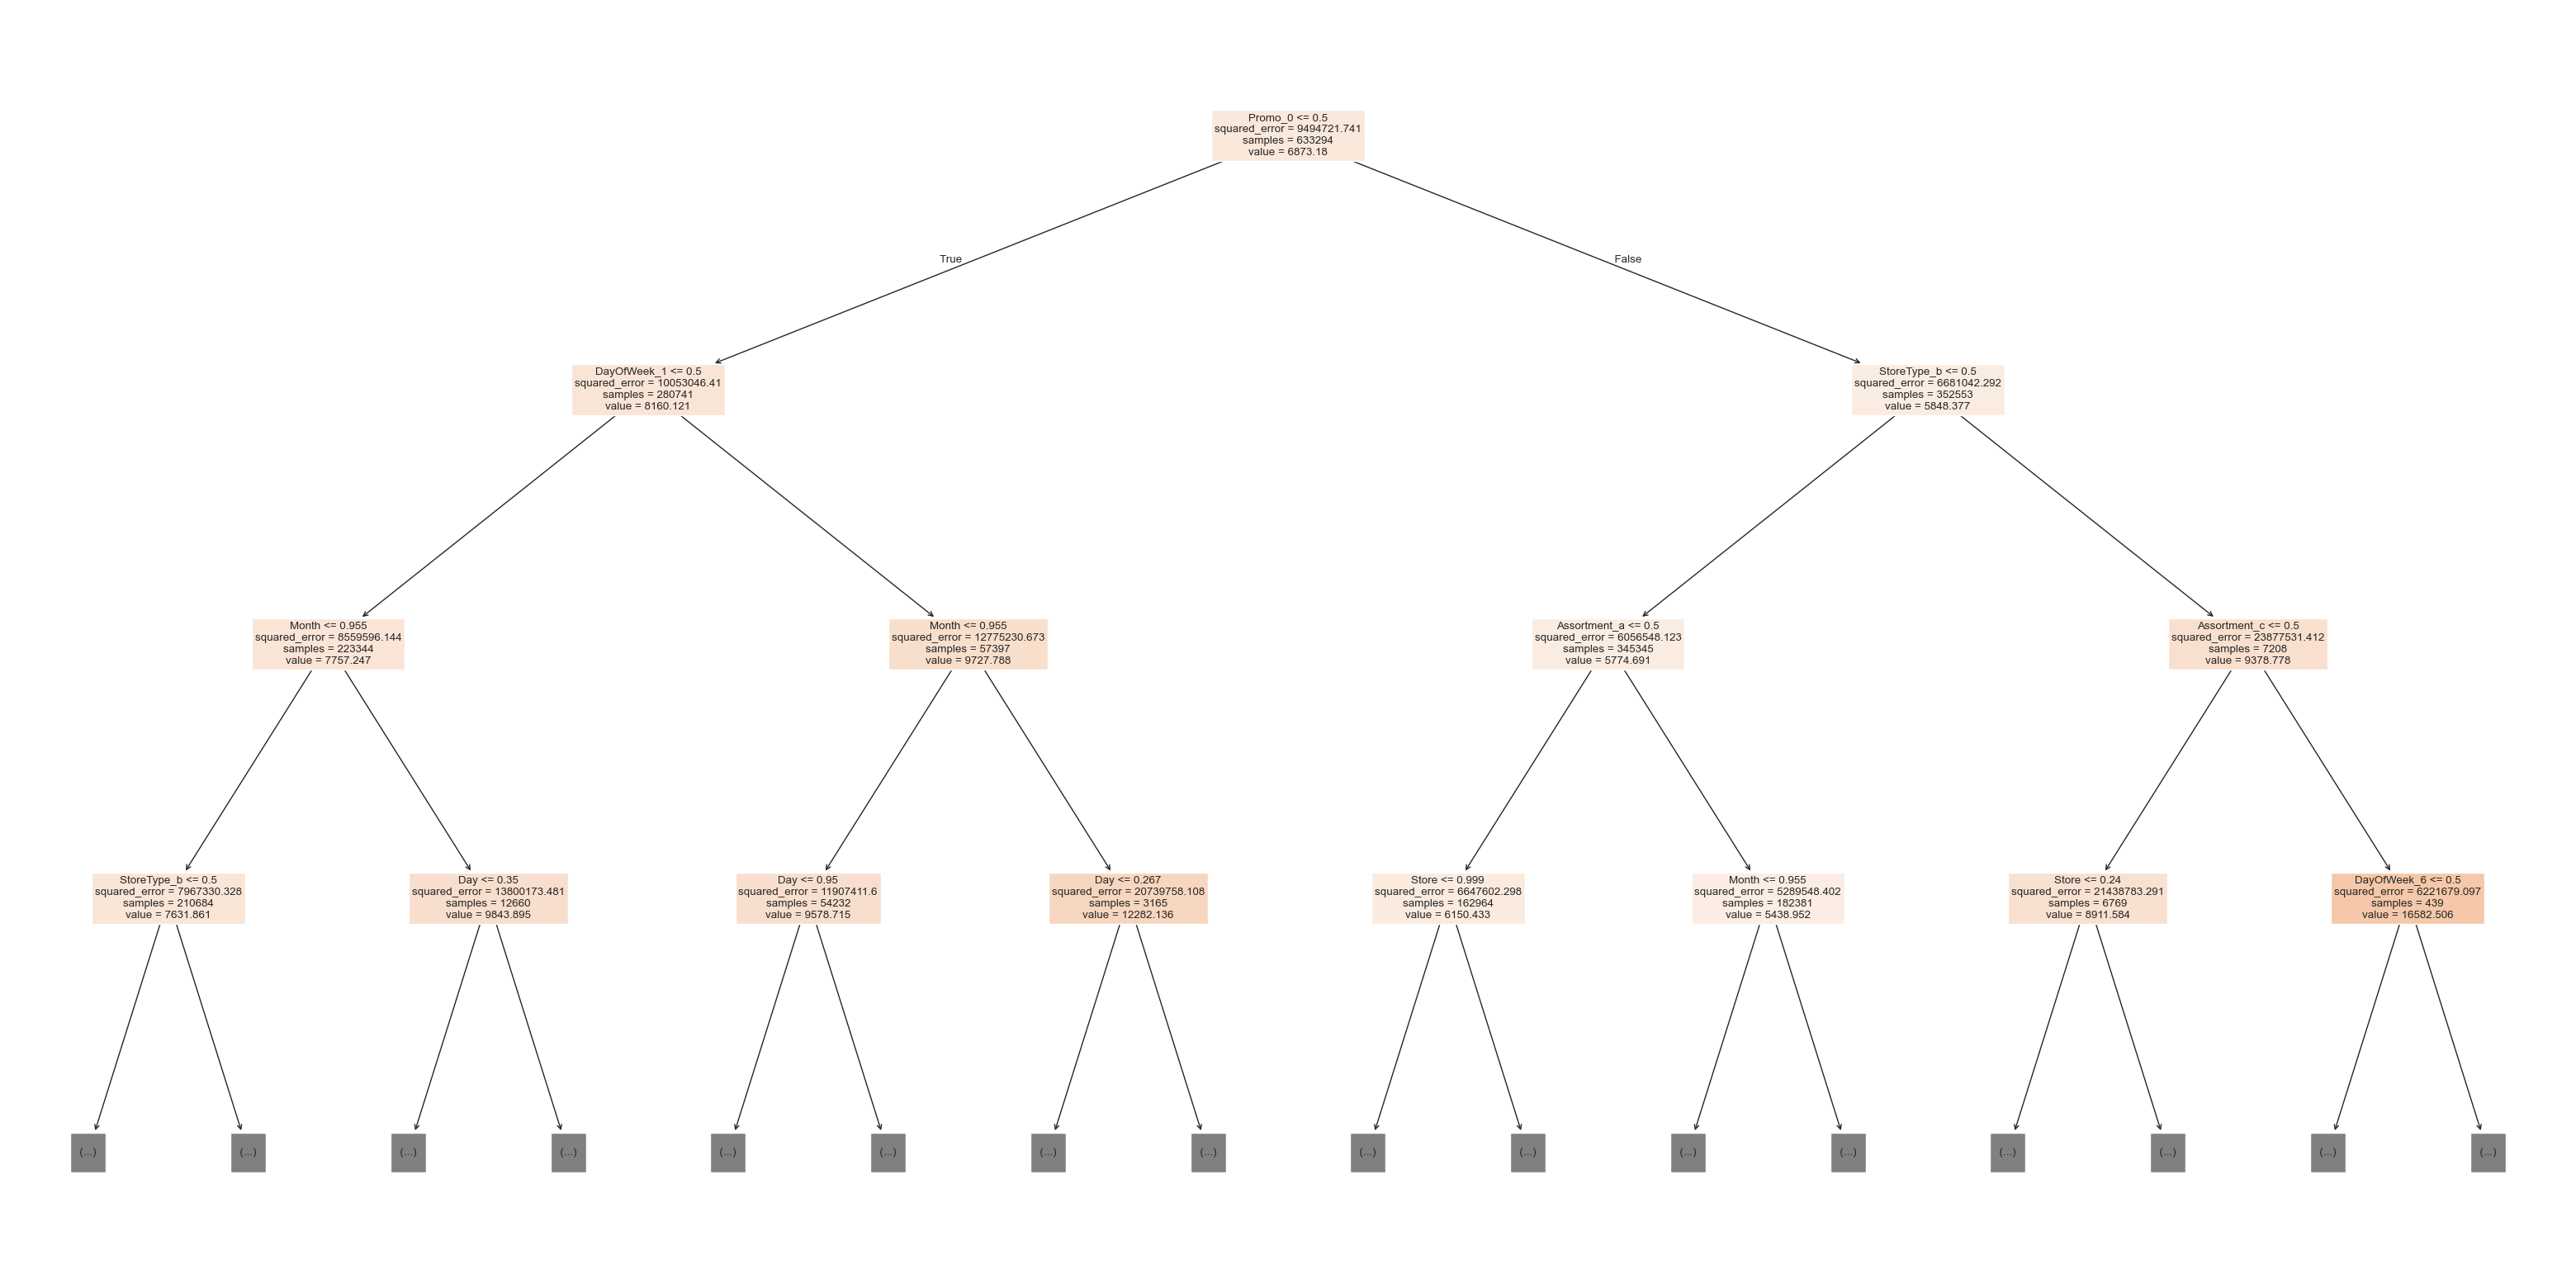

In [101]:
plt.figure(figsize=(40, 20))
plot_tree(tree, max_depth=3, filled=True, feature_names=numeric_cols+encoded_cols);

Let's try a random forest.

In [102]:
from sklearn.ensemble import RandomForestRegressor

In [103]:
%%time
rf = RandomForestRegressor(random_state=42, n_jobs=-1)
try_model(rf)

CPU times: total: 11min 57s
Wall time: 1min 20s


c:\Users\praja\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\praja\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(474.9198974666898, 1371.7321923469985)

We've seen a significant reduction in the loss by using a random forest. 

Tune the hyperparameters of the decision tree and random forest to get better results.

In [ ]:
# Testing DecisionTreeRegressor with different hyperparameters
print("Decision Tree (max_depth=5):", try_model(tree, max_depth=5))
print("Decision Tree (max_depth=10, min_samples_split=10):", try_model(tree, max_depth=10, min_samples_split=10))
print("Decision Tree (max_depth=15, min_samples_leaf=5):", try_model(tree, max_depth=15, min_samples_leaf=5))


c:\Users\praja\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\praja\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Decision Tree (max_depth=5): (2657.375281413782, 2752.4407505629565)


c:\Users\praja\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\praja\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Decision Tree (max_depth=10, min_samples_split=10): (2502.588579283069, 2663.7643349373157)
Decision Tree (max_depth=15, min_samples_leaf=5): (2279.8520159208147, 2502.7669512693965)


c:\Users\praja\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\praja\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [105]:
# Testing RandomForestRegressor with different hyperparameters
print("Random Forest (n_estimators=50, max_depth=5):", try_model(rf, n_estimators=50, max_depth=5))
print("Random Forest (n_estimators=100, max_depth=10):", try_model(rf, n_estimators=100, max_depth=10))
print("Random Forest (n_estimators=200, max_depth=15, min_samples_split=5):", try_model(rf, n_estimators=200, max_depth=15, min_samples_split=5))

c:\Users\praja\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\praja\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Random Forest (n_estimators=50, max_depth=5): (2653.6261624880467, 2750.047889134902)


c:\Users\praja\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\praja\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Random Forest (n_estimators=100, max_depth=10): (2480.927142941282, 2629.5486428446334)


KeyboardInterrupt: 

## Step 7 - Experiment and combine results from multiple strategies

<img src="https://i.imgur.com/ZqM6R8w.png" width="640">

In general, the following strategies can be used to improve the performance of a model:

- Gather more data. A greater amount of data can let you learn more relationships and generalize the model better.
- Include more features. The more relevant the features for predicting the target, the better the model gets.
- Tune the hyperparameters of the model. Increase the capacity of the model while ensuring that it doesn't overfit.
- Look at the specific examples where the model make incorrect or bad predictions and gather some insights
- Try strategies like grid search for hyperparameter optimization and K-fold cross validation
- Combine results from different types of models (ensembling), or train another model using their results.

### Hyperparameter Optimization & Grid Search

You can tune hyperparameters manually, our use an automated tuning strategy like random search or Grid search. Follow this tutorial for hyperparameter tuning using Grid search: https://machinelearningmastery.com/hyperparameter-optimization-with-random-search-and-grid-search/

<img src="https://i.imgur.com/EJCrSZw.png" width="480">

### K-Fold Cross Validation


Here's what K-fold cross validation looks like visually ([source](https://vitalflux.com/k-fold-cross-validation-python-example/)):

<img src="https://i.imgur.com/MxnzWwT.png" width="480">

Follow this tutorial to apply K-fold cross validation: https://machinelearningmastery.com/repeated-k-fold-cross-validation-with-python/

### Ensembling and Stacking

Ensembling refers to combining the results of multiple models. Here's what ensembling looks like visually([source](https://www.kdnuggets.com/2019/01/ensemble-learning-5-main-approaches.html)):

<img src="https://i.imgur.com/rrOKVEd.png" width="480">



Stacking is a more advanced version of ensembling, where we train another model using the results from multiple models. Here's what stacking looks like visually ([source](https://medium.com/ml-research-lab/stacking-ensemble-meta-algorithms-for-improve-predictions-f4b4cf3b9237)): 

<img src="https://i.imgur.com/VVzCWNB.png" width="400">

Here's a tutorial on stacking: https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/

## Step 8 - Interpret models, study individual predictions & present your findings

<img src="https://i.imgur.com/9axhOrA.png" width="640">

### Feature Importance

You'll need to explain why your model returns a particular result. Most scikit-learn models offer some kind of "feature importance" score.

In [106]:
rf.feature_importances_

array([6.07412101e-01, 4.88393196e-02, 4.71254150e-02, 9.30282826e-03,
       3.36941035e-02, 4.40591456e-03, 2.43735761e-03, 2.11467096e-03,
       5.71418981e-03, 6.96554452e-03, 4.47739863e-03, 5.83469269e-02,
       8.05201285e-02, 1.18767484e-03, 2.11472202e-04, 2.45172539e-05,
       1.88388455e-05, 1.38995265e-02, 2.25678813e-02, 1.04169805e-02,
       1.39945667e-02, 8.34303630e-03, 5.50125164e-03, 1.24783549e-02])

In [107]:
importance_df = pd.DataFrame({ 
    'feature': numeric_cols+encoded_cols, 
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)
importance_df.head(10)

,feature,importance
0,Store,0.607412
12,Promo_1,0.080520
11,Promo_0,0.058347
1,Day,0.048839
2,Month,0.047125
4,DayOfWeek_1,0.033694
18,StoreType_b,0.022568
20,StoreType_d,0.013995
17,StoreType_a,0.013900
23,Assortment_c,0.012478


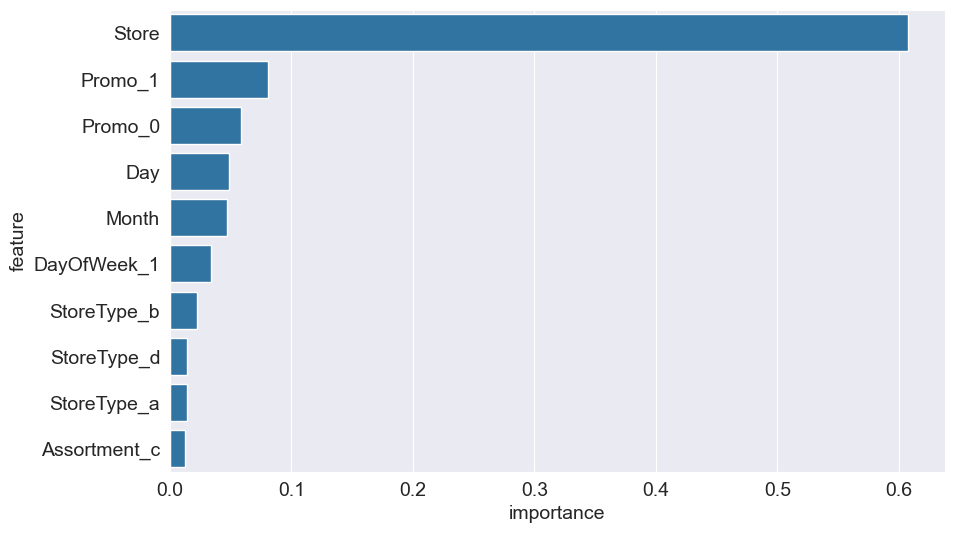

In [108]:
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

The above chart can be presented to non-technical stakeholders to explain how the model arrives at its result. For greater explainability, a single decision tree can be used.

### Looking at individual predictions

In [109]:
def predict_input(model, single_input):
    if single_input['Open'] == 0:
        return 0.
    input_df = pd.DataFrame([single_input])
    input_df['Date'] = pd.to_datetime(input_df.Date)
    input_df['Day'] = input_df.Date.dt.day
    input_df['Month'] = input_df.Date.dt.month
    input_df['Year'] = input_df.Date.dt.year
    input_df[numeric_cols] = imputer.transform(input_df[numeric_cols])
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
    X_input = input_df[numeric_cols + encoded_cols]
    pred = model.predict(X_input)[0]
    return pred

In [110]:
sample_input = {'Id': 1,
 'Store': 1,
 'DayOfWeek': 4,
 'Date': '2015-09-17 00:00:00',
 'Open': 1.0,
 'Promo': 1,
 'StateHoliday': '0',
 'SchoolHoliday': 0,
 'StoreType': 'c',
 'Assortment': 'a',
 'CompetitionDistance': 1270.0,
 'CompetitionOpenSinceMonth': 9.0,
 'CompetitionOpenSinceYear': 2008.0,
 'Promo2': 0,
 'Promo2SinceWeek': np.nan,
 'Promo2SinceYear': np.nan,
 'PromoInterval': np.nan}

sample_input

{'Id': 1,
 'Store': 1,
 'DayOfWeek': 4,
 'Date': '2015-09-17 00:00:00',
 'Open': 1.0,
 'Promo': 1,
 'StateHoliday': '0',
 'SchoolHoliday': 0,
 'StoreType': 'c',
 'Assortment': 'a',
 'CompetitionDistance': 1270.0,
 'CompetitionOpenSinceMonth': 9.0,
 'CompetitionOpenSinceYear': 2008.0,
 'Promo2': 0,
 'Promo2SinceWeek': nan,
 'Promo2SinceYear': nan,
 'PromoInterval': nan}

In [111]:
predict_input(rf, sample_input)

4258.01

Look at various examples from the training, validation and test sets to decide if you're happy with the result of your model.

### Presenting your results

* Create a presentation for non-technical stakeholders
* Understand your audience - figure out what they care about most
* Avoid showing any code or technical jargon, include visualizations
* Focus on metrics that are relevant for the business
* Talk about feature importance and how to interpret results
* Explain the strengths and limitations of the model
* Explain how the model can be improved over time

## Summary and References

![](https://i.imgur.com/kKdAALX.png)

Here's the summary of the step-by-step process you should follow to approach any machine learning problem:

1. Understand the business requirements and the nature of the available data.
2. Classify the problem as supervised/unsupervised and regression/classification.
3. Download, clean & explore the data and create new features that may improve models.
4. Create training/test/validation sets and prepare the data for training ML models.
5. Create a quick & easy baseline model to evaluate and benchmark future models.
5. Pick a modeling strategy, train a model, and tune hyperparameters to achieve optimal fit.
6. Experiment and combine results from multiple strategies to get a better overall result.
7. Interpret models, study individual predictions, and present your findings. 


Check out the following resources to learn more:

- https://vas3k.com/blog/machine_learning/
- https://scikit-learn.org/stable/
- https://github.com/microsoft/ML-For-Beginners